In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import networkx as nx

In [8]:
def shortest_path(graph, node1, node2):
    path_list = [[node1]]
    path_index = 0
    previous_nodes = {node1}
    if node1 == node2:
        return path_list[0]
        
    while path_index < len(path_list): #[0] [0,1] [0,2] [0,9] [0,1,3] [0,1,4]
        current_path = path_list[path_index]
        last_node = current_path[-1]
        next_nodes = graph[last_node]
        if node2 in next_nodes:
            current_path.append(node2)
            return current_path
        for next_node in next_nodes:
            if not next_node in previous_nodes:
                new_path = current_path[:]
                new_path.append(next_node)
                path_list.append(new_path)
                previous_nodes.add(next_node)
        path_index += 1
    return []

G = {
    0: {1, 2, 9},
    1: {0, 3, 4},
    2: {0, 5, 6},
    3: {1, 7},
    4: {1, 8},
    5: {2},
    6: {2},
    7: {3, 9},  
    8: {4},
    9: {0, 7}   
}



state_sequence = shortest_path(G, 0, 5)  
print(state_sequence)




[0, 2, 5]


Başlangıç düğümünden diğer düğümlere olan en kısa mesafeler ve yollar:
0: Mesafe: 0, Yol: [0]
1: Mesafe: 1, Yol: [0, 1]
2: Mesafe: 3, Yol: [0, 1, 2]
3: Mesafe: 2, Yol: [0, 3]
4: Mesafe: 4, Yol: [0, 1, 4]


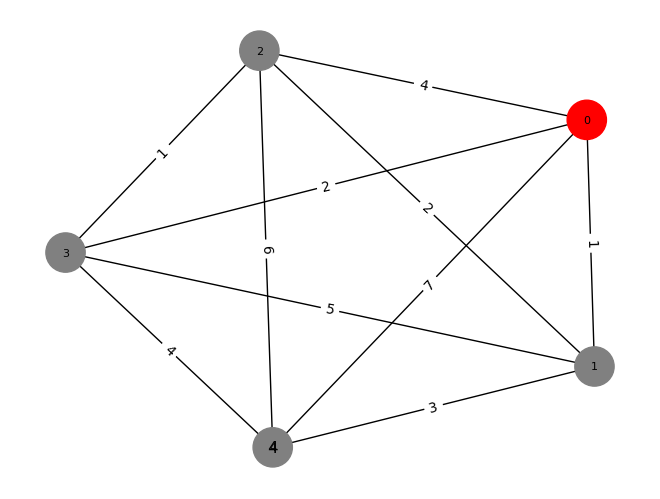

In [10]:
def dijkstra(graph, start):
    
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0
    visited = set()

    paths = {node: [] for node in graph}

    while len(visited) < len(graph):
        current_node = min((node for node in graph if node not in visited), key=lambda x: distances[x])

        for neighbor, weight in graph[current_node].items():
            distance = distances[current_node] + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                paths[neighbor] = paths[current_node] + [current_node]

        visited.add(current_node)

    return distances, paths

G = {
    0: {1: 1, 2: 4, 3: 2, 4: 7},
    1: {0: 1, 2: 2, 3: 5, 4: 3},
    2: {0: 4, 1: 2, 3: 1, 4: 6},
    3: {0: 2, 1: 5, 2: 1, 4: 4},
    4: {0: 7, 1: 3, 2: 6, 3: 4}
}

start_node = 0
result_distances, result_paths = dijkstra(G, start_node)

print("Başlangıç düğümünden diğer düğümlere olan en kısa mesafeler ve yollar:")
for node, distance in result_distances.items():
    path = result_paths[node] + [node]
    print(f"{node}: Mesafe: {distance}, Yol: {path}")


# Graph ı görselleştiriyoruz
G_nx = nx.Graph(G)
node_colors = ['red' if node == start_node else 'gray' for node in G_nx.nodes()]
node_labels = {node:node}
pos = nx.spring_layout(G_nx) 
nx.draw(G_nx, pos, with_labels=True, node_color=node_colors, node_size=800, font_size=8)
nx.draw_networkx_labels(G_nx, pos, labels=node_labels)
edge_labels = {(i, j): weight for i, edges in G.items() for j, weight in edges.items()}
nx.draw_networkx_edge_labels(G_nx, pos, edge_labels=edge_labels)
plt.show()